# Inaugural Project
## Table of contents
1. [Question 1](#paragraph1)

2. [Question 2](#paragraph2)

3. [Question 3](#paragraph3)

4. [Question 4](#paragraph4)
    1. [4a](#subparagraph41)
    2. [4b](#subparagraph42)

5. [Question 5](#paragraph5)
    1. [5a](#subparagraph51)
    2. [5b](#subparagraph52)

6. [Question 6](#paragraph6)
    1. [6a](#subparagraph61)
    2. [6b](#subparagraph62)

7. [Question 7](#paragraph7)

8. [Question 8](#paragraph8)


In the inaugural project we solve a simple 2-good exchange economy with two agents, each with initial endowments of the goods, which sum to 1 for each good. In this project we look at the effects of different market allocatiosn and endowments.

First, we import the neccesary packages, pretty needs to be installed for question 6B. We import ExchangeEconomyClass which contains code which helps solve the questions in the project.

In [73]:
import numpy as np
import matplotlib.pyplot as plt  
from scipy import optimize

# Install prettytable if neccesary
#%pip install prettytable 
from prettytable import PrettyTable 

%load_ext autoreload
%autoreload 2

from inauguralproject import ExchangeEconomyClass
from inauguralproject import market_equlibria

market = ExchangeEconomyClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We define market as our ExchangeEconomy.

# Question 1 <a id="paragraph1"></a>
## Basic Edgeworth box

We call the paretoC function from market. The function iterates over all possible combinations of $(x_1^A, x_2^A)$ where $ x_1^A,x_2^A \in \{0,\frac{1}{75},\frac{2}{75},...,\frac{74}{75},1\}$. Conversely, we get the values of $x_1^B$ and $x_2^B$, since $x_1^B = 1-x_1^A$ and $x_2^B = 1-x_2^B$. If the utility value of a given combination of $x_1^A, x_2^A, x_1^B, x_2^B$ yields the same or higher utility for both A and B relative to the initial endowment, that is $u^A \geq u^A_{initial}$ and $u^B \geq u^B_{initial}$, the function adds the values of $x_1^A$ and $x_2^A$ to two different lists (such that $\textit{kombinationer}$ is a list containing two lists).

In [74]:
kombinationer = market.paretoC()
print(f'{len(kombinationer)} out of {75*75} combinations satisfy C')

1543 out of 5625 combinations satisfy C


We find that there are 1543 combinations out of 5625, where $u^A \geq u^A_{initial}$ and $u^B \geq u^B_{initial}$ holds. 

Now, we can plot all the combinations in an Edgeworth box, calling plot_edgeworth from market.

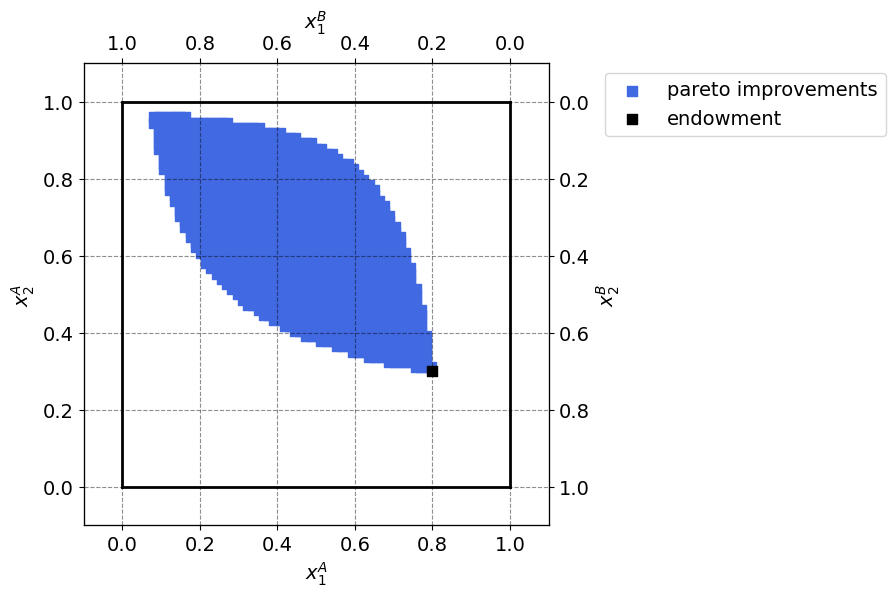

In [75]:
market.plot_edgeworth()

# Question 2 <a id="paragraph2"></a>
## Market error

The widget below shows the error values given different prices.

In [76]:
%matplotlib inline
import ipywidgets as widgets

widgets.interact(
    market.plot_error,
N=widgets.fixed(75),
p1=widgets.FloatSlider(min=0.25, max=2.5, step=0.01, value = 0.9533),
)

interactive(children=(FloatSlider(value=0.9533, description='p1', max=2.5, min=0.25, step=0.01), Output()), _d…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

# Question 3 <a id="paragraph3"></a>
## Market clearing price

To find the market clearing price, we first create the price vector $\mathcal{P}_1$ by calling the function P_1 which simply just returns the list $\mathcal{P}_1$.

Next, we call the function market_clear. For each price, the function calculates the market errors $\epsilon_1$ and $\epsilon_2$, which stems from the price not clearing the market properly wrt. to optimal consumption and initial endowments. 

It iteratively saves the price and errors if the errors were lower than before. We therefore end up with the lowest errors and the market clearing price.


In [77]:
# 1 Create price vector P_1 from 0.5 to 2.5
P_1 = market.P_1()
# 2 Calculate market clearing price from P_1
e1_best, e2_best, p1_best = market.market_clear(P_1)
utilA_3 = market.utility_A(*market.demand_A(p1_best))
utilB_3 = market.utility_B(*market.demand_B(p1_best))

print(f'Market clearing price = {p1_best:.3f}')
print(f'Error 1 = {e1_best:.3f}')
print(f'Error 2 = {e2_best:.3f}\n')

print(f'Utility of A = {utilA_3:.3f}')
print(f'Utility of B = {utilB_3:.3f}')

Market clearing price = 0.953
Error 1 = -0.006
Error 2 = 0.005

Utility of A = 0.571
Utility of B = 0.487


We find that the market clearing price to be $p_1 = 0.953$, which matches with our previous graph. 

The market clearing price can be found analytically as:

$
x_1^{A*} (p_1,\omega^A) + x_1^{B*}(p_1,\omega^B) = 1 \Leftrightarrow$

$\alpha \frac{p_1 w_1^A+w_2^A}{p_1} + \beta \frac{p_1 w_1^A+w_2^B}{p_1} = 1 \Leftrightarrow$

$p_1 (1-\alpha w_1^A-\beta w_1^B) = \alpha w_2^A+\beta w_2^B \Leftrightarrow$

$p_1^* = \frac{\alpha w_2^A+\beta w_2^B}{1-\alpha w_1^A-\beta w_1^B}$

Comparing the market price we found in question 2 with the analytical market price, we see that they are not exactly the same:



In [78]:
par = market.par
p1_star = (par.alpha*par.w2A+par.beta*par.w2B)/(1-par.alpha*par.w1A - par.beta*par.w1B)

print(f'Numerical market clearing price = {p1_best:.3f}')
print(f'Analytical market clearing price = {p1_star:.3f}\n')

market_eps_A = market.check_market_clearing(p1_best)
market_eps_B = market.check_market_clearing(p1_star)

print(f'Market errors for numerical approach = {market_eps_A[0]:.4f}, {market_eps_A[1]:.4f}')
print(f'Market errors for analytical approach = {market_eps_B[0]:.4f}, {market_eps_B[1]:.4f}')

Numerical market clearing price = 0.953
Analytical market clearing price = 0.944

Market errors for numerical approach = -0.0056, 0.0053
Market errors for analytical approach = 0.0000, 0.0000


The analytical solution is more precise as it puts the market errors exactly to zero. However, it would be possible for the numerical solution to reach close to the analytical by increasing N, that is increasing the fineness and amount of numbers in $\mathcal{P}_1$.

# Question 4 <a id="paragraph4"></a>
## 4a <a id="subparagraph41"></a>
$p_1 \in \mathcal{P}_1$

We call A_sets_price from market. The function loops through all prices in $\mathcal{P}_1$ and calculates the utility for consumer A. The function saves utility each time it finds a utility which is higher than the previously highest utility, thus leaving us with the highest utility for the prices in $\mathcal{P}_1$.

In [79]:
x1a_4a, x2a_4a, utilA_4a, p1_4a = market.A_sets_price(P_1)
utilB_4a = market.utility_B(1-x1a_4a, 1-x2a_4a)

print(f'A chooses the market price:\n')
print(f'Consumption of good 1: {x1a_4a:.3f}')
print(f'Consumption of good 2: {x2a_4a:.3f}')
print(f'Utility of A: {utilA_4a:.3f}')
print(f'Utility of B: {utilB_4a:.3f}')
print(f'The optimal price: {p1_4a:.3}')

A chooses the market price:

Consumption of good 1: 0.619
Consumption of good 2: 0.641
Utility of A: 0.634
Utility of B: 0.373
The optimal price: 1.89


We plot the utility function of A from the prices in $\mathcal{P}_1$ and the maximum which we found.

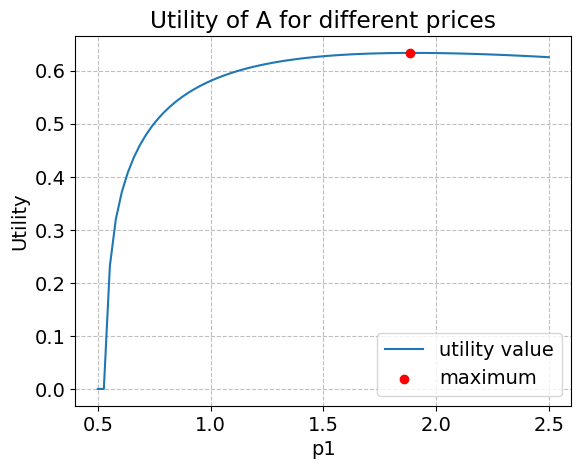

In [80]:
market.plot_utility_A(P_1)

We confirm that our numerical solution is correct as it is on the maximum of the utility function. The function is quite flat around the maximum, which suggests an inefficiently high price for a socia, as A is increasing the price a lot for very little utility gain.

## 4b <a id="subparagraph42"></a>
$p_1 > 0$

We now call an optimizer to solve the maximization problem. We call A_sets_price_optimize() from market. The function uses the same utility function as in 4a, but now uses np.optimize with the method "SLSQP" to solve the problem.

In [81]:
x1a_4b, x2a_4b, utilA_4b, p1_4b = market.A_sets_price_optimize()
utilB_4b = market.utility_B(1-x1a_4b, 1-x2a_4b)

# Compare with numerical optimization

print(f'Restricted price = {p1_4a:.3f}\nRestricted util of A = {utilA_4a:.3f}')
print(f'Restricted util of B: {utilB_4a:.3f}\n')

print(f'Unrestricted price = {p1_4b:.3f}\nUnrestricted util of A = {utilA_4b:.3f}')
print(f'Unrestricted util of B: {utilB_4b:.3f}\n')

diff_p = p1_4b - p1_4a
diff_util = utilA_4b - utilA_4a

print(f'difference in price = {diff_p:.3f}')
print(f'difference in utility = {diff_util:.6f}')

Restricted price = 1.887
Restricted util of A = 0.634
Restricted util of B: 0.373

Unrestricted price = 1.897
Unrestricted util of A = 0.634
Unrestricted util of B: 0.373

difference in price = 0.010
difference in utility = 0.000005


The results are very similar. The optimizer is better as it finds a higher utility because it freely chooses any point rather than a fixed set. However, there is only a difference in utility down to the 6th decimal. The tiny difference in utility is explained by the utility function being very flat around it's peak.

# Question 5 <a id="paragraph5"></a>
## 5a <a id="subparagraph51"></a>

A now chooses a Pareto point in $\mathcal{C}$ that maximizes his own utility. The function A_market_maker loops through all 1543 Pareto combinations of $x_1^A$ and $x_2^A$ and saves the utility each time a combination satisfies $u_{A\_now}>u_{A\_pre}$, thus leaving us with the highest possible utility.

In [82]:
x1a_5a, x2a_5a, utilA_5a = market.A_market_maker()
utilB_5a = market.utility_B(1-x1a_5a, 1-x2a_5a)

print(f'x1A = {x1a_5a:.4f}')
print(f'x2A = {x2a_5a:.4f}\n')
print(f'utility_A = {utilA_5a:.4f}')
print(f'utility_B = {utilB_5a:.4f}')


x1A = 0.5811
x2A = 0.8378

utility_A = 0.7416
utility_B = 0.3053


As expected the utility of consumer A is now higher than in 4 where there was a trading price, because A can now freely choose the point in C which benefits him the most rather than having to trade with consumer B.

A now consumes more of good 2 which he derives more utility from and less of good 1. The utility of B has understandbly fallen. 

## Question 5B <a id="subparagraph52"></a>
We now repeat the same analysis but with a constrained optimizer. A_market_maker_optimize calls a constrained optimizer which maximizes the utility of A under the constraint that the utility of B is at least equal to $\bar{u}_B$, which is the utility when consuming the intial endowment.


In [83]:
x1a_5b, x2a_5b, utilA_5b = market.A_market_maker_optimize()
utilB_5b = market.utility_B(1-x1a_5b, 1-x2a_5b)

print(f'x1A = {x1a_5b:.4f}')
print(f'x2A = {x2a_5b:.4f}\n')

print(f'utility of A = {utilA_5b:.4f}')
print(f'utility of B = {utilB_5b:.4f}\n')
print(f'Difference in utility for consumer A:')
print(f'util_5b - util_5a = {utilA_5b - utilB_5a:.4f}')

x1A = 0.5757
x2A = 0.8444

utility of A = 0.7432
utility of B = 0.3037

Difference in utility for consumer A:
util_5b - util_5a = 0.4379


The optimizer again beats the manual looping as expected, but the difference in consumption and utility is again very small.

# Question 6 <a id="paragraph6"></a>

## 6a <a id="subparagraph61"></a>

We want to find the allocation when a utilitarian social planner chooses the consumption. We call the social_planner function which calls an optimzer to max the total sum of utilities.

In [84]:
x1a_6a, x2a_6a, utilA_6a, utilB_6a, sum_util = market.social_planner()

print(f'Optimal allocation: (x1a, x2a) = ({x1a_6a:.3f}, {x2a_6a:.3f})')
print(f'Optimal allocation: (x1b, x2b) = ({1-x1a_6a:.3f}, {1-x2a_6a:.3f})\n')
9
print(f'utility_A = {utilA_6a:.3f}')
print(f'utility_B = {utilB_6a:.3f}')
print(f'utility sum = {sum_util:.3f}')

Optimal allocation: (x1a, x2a) = (0.333, 0.667)
Optimal allocation: (x1b, x2b) = (0.667, 0.333)

utility_A = 0.529
utility_B = 0.529
utility sum = 1.058


We find that consumer A and B exactly consume their preference for good 1, $\alpha$ and $\beta$ respectively, and likewise for good 2. This makes sense intuitively since they have Cobb-Douglas preferences and would prefer to consume in this relative ratio. They have the same utility due to parrallel preferences.

## 6B <a id="subparagraph62"></a>
The allocations are showed below in both a table and an interactive Edgeworth box

In [85]:
# Adding headers
myTable = PrettyTable(["Question", "Util_A", "Util_B", "Sum of utility"]) 
 
# Adding rows
myTable.add_row(["3", f'{utilA_3:.3f}', f'{utilB_3:.3f}', f'{utilA_3 + utilB_3:.4f}']) 
myTable.add_row(["4a", f'{utilA_4a:.3f}', f'{utilB_4a:.3f}', f'{utilA_4a + utilB_4a:.3f}']) 
myTable.add_row(["4b", f'{utilA_4b:.3f}', f'{utilB_4b:.3f}', f'{utilA_4b + utilB_4b:.3f}']) 
myTable.add_row(["5a", f'{utilA_5a:.3f}', f'{utilB_5a:.3f}', f'{utilA_5a + utilB_5a:.3f}']) 
myTable.add_row(["5b", f'{utilA_5b:.3f}', f'{utilB_5b:.3f}', f'{utilA_5b + utilB_5b:.3f}']) 
myTable.add_row(["6a", f'{utilA_6a:.3f}', f'{utilB_6a:.3f}', f'{sum_util:.4f}']) 
 
print(myTable)


+----------+--------+--------+----------------+
| Question | Util_A | Util_B | Sum of utility |
+----------+--------+--------+----------------+
|    3     | 0.571  | 0.487  |     1.0579     |
|    4a    | 0.634  | 0.373  |     1.007      |
|    4b    | 0.634  | 0.373  |     1.006      |
|    5a    | 0.742  | 0.305  |     1.047      |
|    5b    | 0.743  | 0.304  |     1.047      |
|    6a    | 0.529  | 0.529  |     1.0583     |
+----------+--------+--------+----------------+


We see that consumer A experiences increasing utility because he gets to reallocate or price set according to his own preferences.

The social planner leads to the most efficient outcome with an increase in total utility by 0.0004, the allocation is however not Pareto efficient as consumer A is worse off than in the market allocation.

The 3 allocations are illustrated below in the interactive Edgeworth box, which adds the indifference curves of A and B as well as the budget line created from p1.


In [86]:
%matplotlib inline
import ipywidgets as widgets

widgets.interact(
    market.plot_edgeworth2,
N=widgets.fixed(75),
p1=widgets.FloatSlider(
    value=0.9444, 
    min = 0.9444, 
    max = 1.8867, 
    step = 0.9423),
u_a=widgets.FloatSlider(
    value=0.5713,
    min = 0.5713,
    max = 0.7432,
    step = 0.0623,
    description='Ua_bar:',
    ),
u_b=widgets.FloatSlider(
    value=0.4865,
    min = 0.3053,
    max = 0.4865,
    step = 0.068,
    description='Ub_bar:',
    )
)

interactive(children=(FloatSlider(value=0.5713, description='Ua_bar:', max=0.7432, min=0.5713, step=0.0623), F…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

i) 
The plot initially shows the market clearing allocation from 3) which is the point on the contract curve where each consumer maximizes utility by increasing their indifference curve until the curves exactly tangent the budget line. 

ii) 
The allocation in 4), with p1 = 1.89, Ua_bar = 0.63 and Ub_bar = 0.37, is inefficient. There are Pareto efficient points in the cigar between the two indifference curves. As shown below, A chooses a price which is not market clearing when both optimize. 

A consumes too much of $x_1^A$ and too little of $x_2^A$. If A was able to choose a price again after reaching this point he would choose a new lower price and both would benefit.


In [87]:
market_error_pricesetter = market.check_market_clearing(p1_4b)
print(f'(eps1, eps2) = ({market_error_pricesetter[0]:.4f}, {market_error_pricesetter[1]:.4f})')

(eps1, eps2) = (-0.3012, 0.5714)


iii)
The allocation in 5) is found with $\bar{U}_a = 0.74$ and $\bar{U}_{b}$, freely chooses a Pareto point by pushing the indifference curve to the edge of the Pareto efficient area. The allocation is efficient as the market clears, which makes it preferred than 4) from an efficiency standpoint as the sum of utilities is higher.

This allocation is not as fair as in 4) because rather than trading at the market price, A forcces the choice of B. As shown in the table, the utility is B is worse off in this case. 

A choosing the price is inefficient but consumer B has a higher utility than when A is the market maker.

# Question 7 <a id="paragraph7"></a>
We draw 50 random elements from a uniform distribution. 

In [88]:
np.random.seed(2024)

def W_float(N=50):
    wList = []
    for i in range(N):
        w_a = np.random.uniform(0, 1)
        w_b = np.random.uniform(0, 1)
        wList.append((w_a, w_b))
    return wList
wlist = W_float()

# Question 8 <a id="paragraph8"></a>
We want to find the market equlibrium allocation for each initial endowment $\omega_A$

In [89]:
# Use market_equilibria to find equilibrium for each inital endowment
x1_eq, x2_eq, p1_eq = market_equlibria(wlist) 

for i in range(10): # Print first 10 market equilibriums, checks that the market clears
    print(f' {i+1} x1a + x1b: {x1_eq[i][0] + x2_eq[i][0]:.3f} | p1* = {p1_eq[i]:.3f}')

 1 x1a + x1b: 1.000 | p1* = 0.819
 2 x1a + x1b: 1.000 | p1* = 1.646
 3 x1a + x1b: 1.000 | p1* = 1.572
 4 x1a + x1b: 1.000 | p1* = 0.764
 5 x1a + x1b: 1.000 | p1* = 1.053
 6 x1a + x1b: 1.000 | p1* = 1.224
 7 x1a + x1b: 1.000 | p1* = 0.648
 8 x1a + x1b: 1.000 | p1* = 0.837
 9 x1a + x1b: 1.000 | p1* = 1.224
 10 x1a + x1b: 1.000 | p1* = 0.757


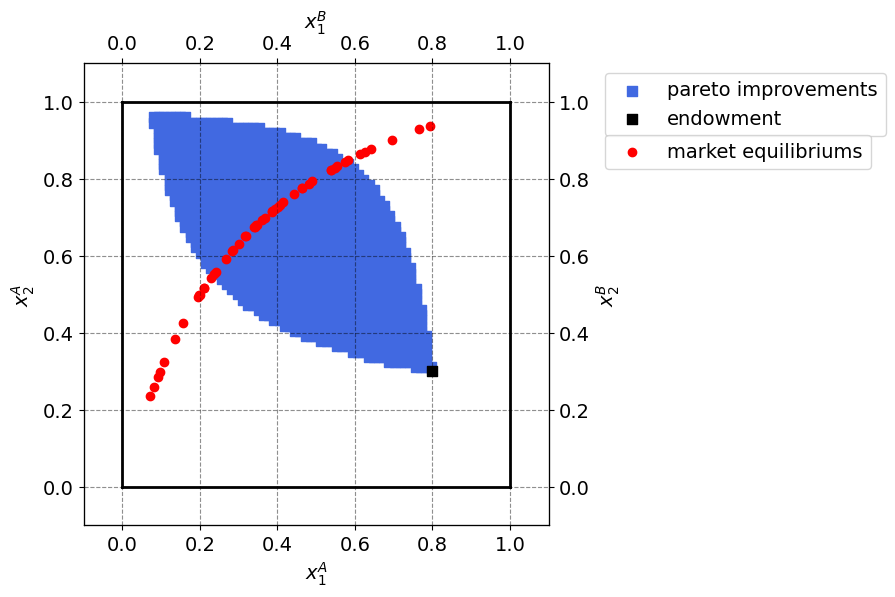

In [90]:
market.plot_edgeworth()

# plot all 50 market clearing allocations
x1_8, x2_8 = zip(*x1_eq)
plt.scatter(x1_8,x2_8,marker='o',color='red',label='market equilibriums')
ax = plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()
ax.legend(loc = "lower right", bbox_to_anchor=(1.713,0.75))

We have plotted all the market clearing allocations and we see that they create the contract curve in the Edgeworth box